In [4]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


recommendation is: 5.00000019762285


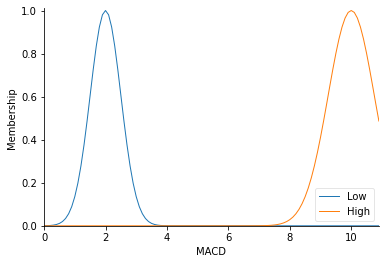

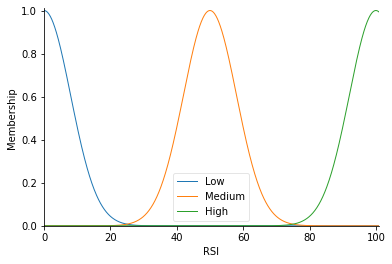

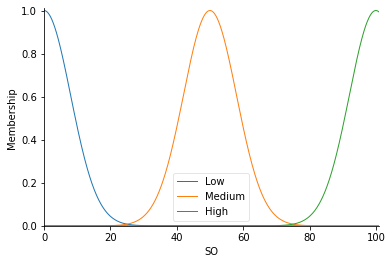

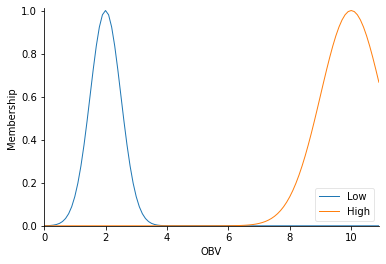

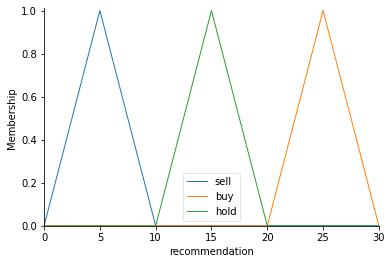

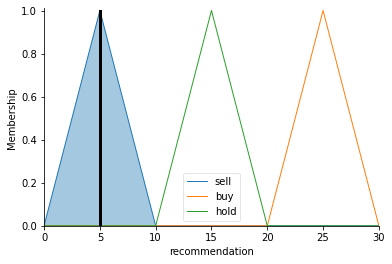

In [6]:
import numpy as np
import skfuzzy as fz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt


#input
MACD = ctrl.Antecedent(np.arange(0,11,0.1),'MACD') #Antecedent: Input
RSI = ctrl.Antecedent(np.arange(0,101,0.1),'RSI') 
SO = ctrl.Antecedent(np.arange(0,101,0.1),'SO') 
OBV = ctrl.Antecedent(np.arange(0,11,0.1),'OBV') 

#output
recommendation = ctrl.Consequent(np.arange(0,31,1),"recommendation")

#MACD
MACD['Low'] = fz.gaussmf(MACD.universe,2,0.5)
MACD['High'] = fz.gaussmf(MACD.universe,10,0.75)
MACD.view()
#RSI
RSI['Low'] = fz.gaussmf(RSI.universe,0,8)
RSI['Medium'] = fz.gaussmf(RSI.universe,50,8)
RSI['High'] = fz.gaussmf(RSI.universe,100,8)
RSI.view()
#SO
SO['Low'] = fz.gaussmf(RSI.universe,0,8)
SO['Medium'] = fz.gaussmf(RSI.universe,50,8)
SO['High'] = fz.gaussmf(RSI.universe,100,8)
SO.view()
#OBV
OBV['Low'] = fz.gaussmf(OBV.universe,2,0.5)
OBV['High'] = fz.gaussmf(OBV.universe,10,1)
OBV.view()
#REC
recommendation['sell'] = fz.trimf(recommendation.universe,[0,5,10])
recommendation['buy'] = fz.trimf(recommendation.universe,[20,25,30])
recommendation['hold'] = fz.trimf(recommendation.universe,[10,15,20])
recommendation.view()

rule1 = ctrl.Rule(MACD['High'] & RSI['Low'] & SO['Low'] & OBV['High'], recommendation['buy'])
rule2 = ctrl.Rule(MACD['Low'] & RSI['High'] & SO['High'] & OBV['Low'], recommendation['buy'])
rule3 = ctrl.Rule(MACD['High'] & RSI['Medium'] & SO['Medium'] & OBV['High'], recommendation['buy'])
rule4 = ctrl.Rule(MACD['Low'] & RSI['Medium'] & SO['High'] & OBV['Low'], recommendation['sell'])
rule5 = ctrl.Rule( RSI['Low'] & SO['Low'] & OBV['High'], recommendation['buy'])
rule6 = ctrl.Rule( RSI['High'] & SO['High'] & OBV['Low'], recommendation['sell'])
rule7 = ctrl.Rule( MACD['Low'] & RSI['Medium'] & SO['Medium'], recommendation['hold'])
rule8 = ctrl.Rule( MACD['High'] & RSI['Medium'] & SO['Medium'] & OBV['Low'], recommendation['hold']) 
rule9 = ctrl.Rule( MACD['Low'] & RSI['High'] & SO['High'], recommendation['sell'])


rule = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
model = ctrl.ControlSystemSimulation(rule)

model.input['MACD'] = 2
model.input['RSI'] = 50  
model.input['SO'] = 100 
model.input['OBV'] = 2

model.compute()
print('recommendation is:',model.output['recommendation'])
recommendation.view(sim = model)